![alt text](Task.JPG "Задание")

# prev

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

def U(x) -> float:
    return x ** 2 / 2

class Shrodinger:
    def __init__(self):
        self.x = list()
        self.psi_analit = list()
        self. psi= list(list())
    def A(self, x, U, N):
        h = x[1] - x[0]
        a = list()
        for i in range(N):
            a.append(1. / (2 * h ** 2))
        a[0] = 0
        b = list()
        for i in range(len(a)):
            b.append(1. / (h * h) + U(a[i]))
        c = list()
        for i in range(N):
            c.append(-1. / (2 * h **2))
        return a, b, c
    def solve(self, left, right, N, number_of_iter, levels, U):
        self.realloc(N)
        self.E = list()
        self.psi = list(list())
        dx = (right - left) / (N - 1)
        self.x = list()
        for i in range(N):
            self.x.append(left + dx * i)
        a, b, c = self.A(self.x, U, N)
        psi_zero = list()
        for i in range(N):
            psi_zero.append(1. + float(i) / (N - 1))
        for i in range(levels):
            psi_next = list(psi_zero)
            self.orthogonalization(psi_next, self.psi)
            psi_prev = list()
            for k in range(number_of_iter):
                psi_prev = psi_next
                psi_next = self.tridiagonalMatrix(list(a), list(b), list(c), list(psi_next), N)
                self.orthogonalization(psi_next, self.psi)
            E_zero = self.norm(psi_prev) / self.norm(psi_next)
            self.E.append(E_zero)
            self.psi.append(psi_next)
    def multiply(self, psi_next, coeff):
        for i in range(len(psi_next)):
            psi_next[i] *= coeff
    def tridiagonalMatrix(self, a, b, c, d, N):
        y = list()
        for i in range(N):
            y.append(0.)
        i = 1
        while i < N:
            xi = a[i] / b[i - 1]
            a[i] = 0
            b[i] -= xi * c[i - 1]
            d[i] -= xi * d[i - 1]
            i += 1
        y[N - 1] = d[N - 1] / b[N - 1]
        i = N - 2
        while i >= 0:
            y[i] = 1 / b[i] * (d[i] - c[i] * y[i + 1])
            i -= 1
        return y
    def orthogonalization(self, psi_next, psi_prevs):
        for psi in psi_prevs:
            normal = self.norm(psi)
            inner_prod = self.inner(psi_next, psi)
            mult = inner_prod / normal
            for i in range(len(psi_next)):
                psi_next[i] -= psi[i] * mult
    def inner(self, a, b):
        res = 0.
        for i in range(len(a)):
            res += a[i] * b[i]
        return res
    def norm(self, a):
        res = 0.
        for i in range(len(a)):
            res += a[i] ** 2
        return res
    def realloc(self, N):
        self.psi_analit = list()
        for i in range(N):
            self.psi_analit.append(0.)

In [14]:
N = 20
number_of_iter = 300
level = 1
solver = Shrodinger()

In [15]:
solver.solve(-10, 10, N, number_of_iter, level, U)

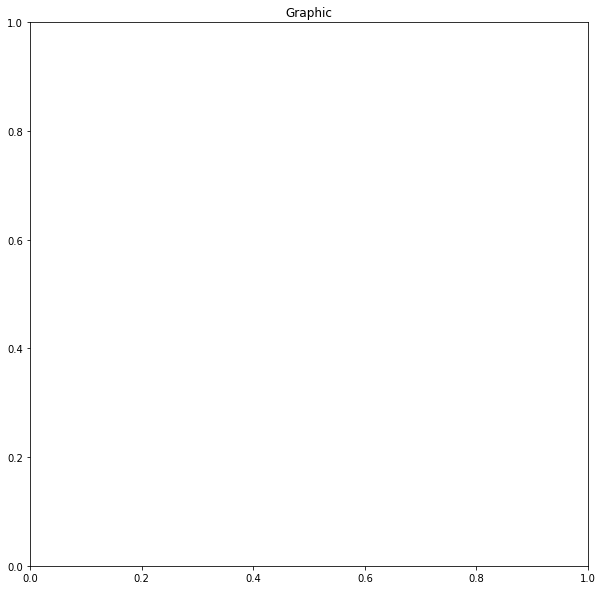

In [13]:
x_list = solver.x
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.title("Graphic")
for i in range(len(solver.psi)):
    ax.plot(x_list, solver.psi[i], label = "explicit x")

# new

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')

![alt text](tma.JPG "Задание")

In [3]:
#tridiagonal matrix algorithm
def tma_solver(a, b, c, d):
    n = d.shape[0]
    b_ = b.astype(dtype = float)
    f_ = d.astype(dtype = float)
    for i in range(1, n):
        factor = a[i - 1] / b_[i - 1]
        b_[i] = b_[i] - factor * c[i - 1] 
        f_[i] = f_[i] - factor * f_[i - 1] 
    x = b_.astype(dtype=float)
    x[-1] = f_[-1] / b_[-1]
    for i in range(n - 2, 0 - 1, -1):
        x[i] = (f_[i] - c[i] * x[i + 1]) / b_[i]
    return x

In [4]:
# eigen value && eigen vector == собственное значение и собственный вектор
def back_iteration_eigen_solver(a, b, c, start_eigen_vec, iters):
    eigen_vec = start_eigen_vec / np.linalg.norm(start_eigen_vec)
    eigen_val = np.nan
    for _ in range(iters):
        eigen_vec = tma_solver(a, b, c, eigen_vec)
        norm = np.linalg.norm(eigen_vec)
        eigen_val = 1 / norm
        eigen_vec /= norm
    return eigen_vec / np.linalg.norm(eigen_vec), eigen_val

In [18]:
n = 1000
iters = 100
x_width = 20
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 10]
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

def update():
    global iters 
    global x_width 
    global n
    # массив значений x [-xw/2; xw/2] с шагом x_width/n
    x = np.linspace(-x_width / 2, x_width / 2, n)
    #типо dx
    h = x[1] - x[0]
    # Потенциал
    # условия сшивки
    u = np.array([-1 if i < 0.5 and i > -0.5 else 0 for i in x])#np.array([-1 if i > 0.5 and i < -0.5 else 0 for i in x])
    # Матрица гамильтона по диагоналям. Остальные элементы матрицы гамильтона == 0
    a = np.full(x.shape[0] - 1, -1 /  h**2 / 2, dtype = float)
    b = np.full(x.shape[0], 1 / h**2, dtype=float)
    b += u
    d = np.random.RandomState(2).random_sample(x.shape)
    eigen_vec, eigen_val =  back_iteration_eigen_solver(a, b, a, d, iters)
    gt = np.exp(-u)
    gt /= np.linalg.norm(gt)
    ax.clear()
    ax.set_title(f"Собственное значение = {eigen_val}")
    ax.plot(x, eigen_vec, lw=4, label="Полученное решение")
    #ax.plot(x, gt, label="Реальное решение")
    #ax.set_ylim(0, 0.40)
    ax.legend()
    ax.grid()
    plt.rcParams['figure.figsize'] = [10, 10]
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    # img is rgb, convert to opencv's default bgr
    image = cv.cvtColor(image,cv.COLOR_RGB2BGR)
    cv.imshow("img", image)
def change_iter(val):
    global iters
    if val>0:
        iters = val
    update()
def change_xw(val):
    global x_width
    if val>0:
        x_width = val
    update()
def change_n(val):
    global n
    if val>1:
        n = val
    update()

In [17]:
cv.imshow("img", image)
cv.namedWindow('settings')
cv.createTrackbar('iter', "settings", 100, 1000, change_iter)
cv.createTrackbar('xw', "settings", 20, 100, change_xw)
cv.createTrackbar('n', "settings", 1000, 1000, change_n)
cv.waitKey(0)
cv.destroyAllWindows()